In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Enable XLA
tf.config.optimizer.set_jit(True)

In [4]:
(train_imgs,train_labels),(test_imgs,test_labels) = cifar10.load_data()

In [6]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

In [8]:
# Convert labels to integers for sparse categorical crossentropy
train_labels_f = train_labels.flatten()
test_labels_f = test_labels.flatten()

In [9]:
# Convert labels to one-hot encoded format for categorical crossentropy
num_classes = 10
train_labels_o = to_categorical(train_labels, num_classes=num_classes)
test_labels_o = to_categorical(test_labels, num_classes=num_classes)

In [ ]:
plt.figure(figsize=(20,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(train_imgs[i])
    plt.xlabel(classes[train_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [10]:
def create_model(optimizer, loss_function):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

    # Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the given optimizer and loss function
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

    return model

In [11]:
optimizers = ['adam', 'rmsprop', 'sgd']
loss_functions = ['sparse_categorical_crossentropy', 'categorical_crossentropy']

In [12]:
results = {}

In [13]:
for optimizer in optimizers:
    for loss_function in loss_functions:
        print(f"Optimizer: {optimizer}, Loss Function: {loss_function}")

        # Create the model
        model = create_model(optimizer, loss_function)

        # Train the model
        if(loss_function == 'sparse_categorical_crossentropy'):
            history = model.fit(train_imgs, train_labels, epochs=30, validation_split = 0.3, batch_size=256, verbose=1)
        else:
            history = model.fit(train_imgs, train_labels_o, epochs=30, validation_split = 0.3, batch_size=256, verbose=1)

        print()

        # Store the results
        results[(optimizer, loss_function)] = {
            'train_accuracy': history.history['accuracy'],
            'train_loss': history.history['loss'],
            'val_accuracy': history.history['val_accuracy'],
            'val_loss': history.history['val_loss']
        }

Optimizer: adam, Loss Function: sparse_categorical_crossentropy
Epoch 1/30
137/137 [==============================] - 38s 93ms/step - loss: 1.7437 - accuracy: 0.3650 - val_loss: 1.4956 - val_accuracy: 0.4600
Epoch 2/30
137/137 [==============================] - 42s 305ms/step - loss: 1.3859 - accuracy: 0.4999 - val_loss: 1.3001 - val_accuracy: 0.5392
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 1.2124 - accuracy: 0.5698 - val_loss: 1.1904 - val_accuracy: 0.5803
Epoch 4/30
137/137 [==============================] - 1s 9ms/step - loss: 1.1085 - accuracy: 0.6086 - val_loss: 1.1330 - val_accuracy: 0.6007
Epoch 5/30
137/137 [==============================] - 1s 8ms/step - loss: 1.0125 - accuracy: 0.6437 - val_loss: 1.0462 - val_accuracy: 0.6381
Epoch 6/30
137/137 [==============================] - 1s 9ms/step - loss: 0.9455 - accuracy: 0.6702 - val_loss: 1.0296 - val_accuracy: 0.6419
Epoch 7/30
137/137 [==============================] - 1s 9ms/step - loss: 0.88

In [14]:
for key, value in results.items():
    print(f"Optimizer: {key[0]}, Loss Function: {key[1]}")
    print(f"Train Accuracy: {value['train_accuracy'][-1]:.4f}, Train Loss: {value['train_loss'][-1]:.4f}")
    print(f"Validation Accuracy: {value['val_accuracy'][-1]:.4f}, Validation Loss: {value['val_loss'][-1]:.4f}")
    print()

Optimizer: adam, Loss Function: sparse_categorical_crossentropy
Train Accuracy: 0.9491, Train Loss: 0.1528
Validation Accuracy: 0.7015, Validation Loss: 1.3660

Optimizer: adam, Loss Function: categorical_crossentropy
Train Accuracy: 0.9594, Train Loss: 0.1271
Validation Accuracy: 0.7028, Validation Loss: 1.4608

Optimizer: rmsprop, Loss Function: sparse_categorical_crossentropy
Train Accuracy: 0.9772, Train Loss: 0.0729
Validation Accuracy: 0.6894, Validation Loss: 1.9203

Optimizer: rmsprop, Loss Function: categorical_crossentropy
Train Accuracy: 0.9700, Train Loss: 0.1014
Validation Accuracy: 0.6975, Validation Loss: 1.6687

Optimizer: sgd, Loss Function: sparse_categorical_crossentropy
Train Accuracy: 0.5497, Train Loss: 1.2783
Validation Accuracy: 0.5147, Validation Loss: 1.3649

Optimizer: sgd, Loss Function: categorical_crossentropy
Train Accuracy: 0.5522, Train Loss: 1.2660
Validation Accuracy: 0.5332, Validation Loss: 1.3262



Optimizer: adam, Loss Function: sparse_categorical_crossentropy


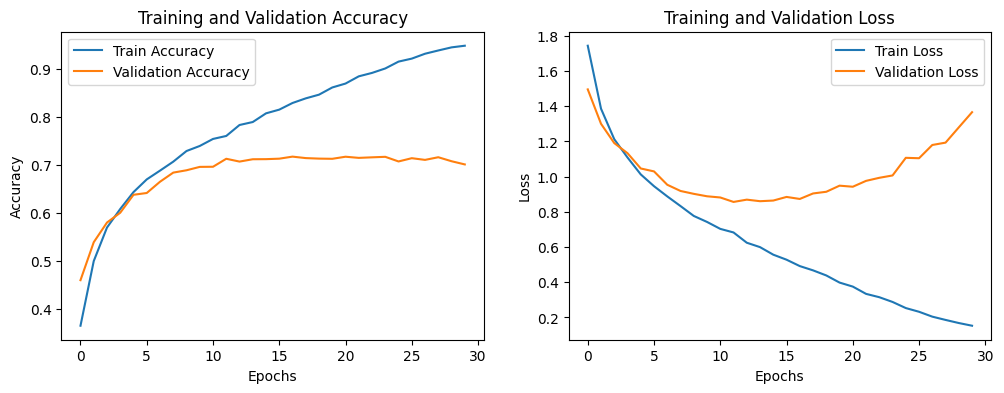

Optimizer: adam, Loss Function: categorical_crossentropy


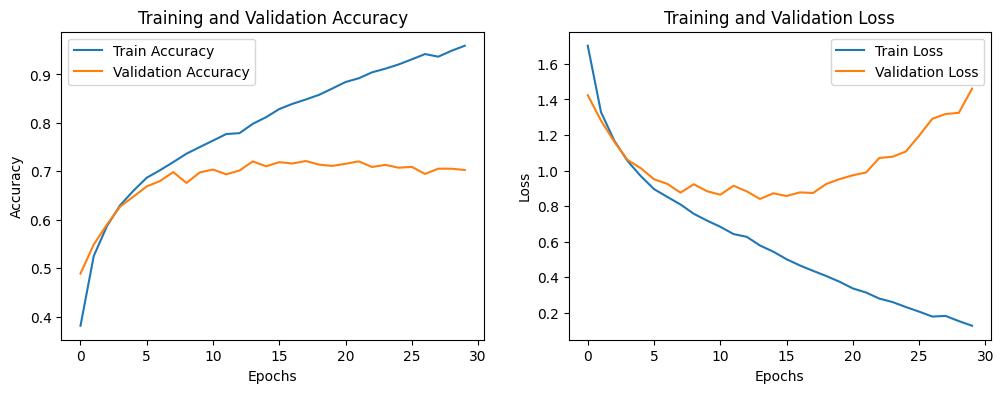

Optimizer: rmsprop, Loss Function: sparse_categorical_crossentropy


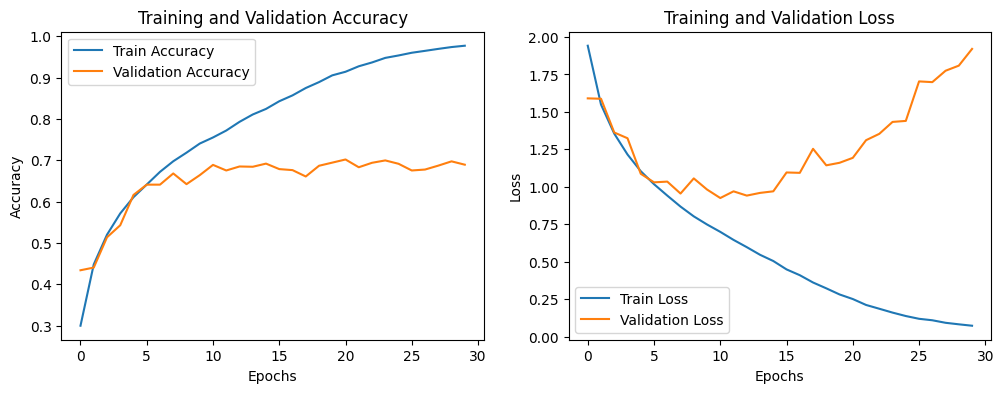

Optimizer: rmsprop, Loss Function: categorical_crossentropy


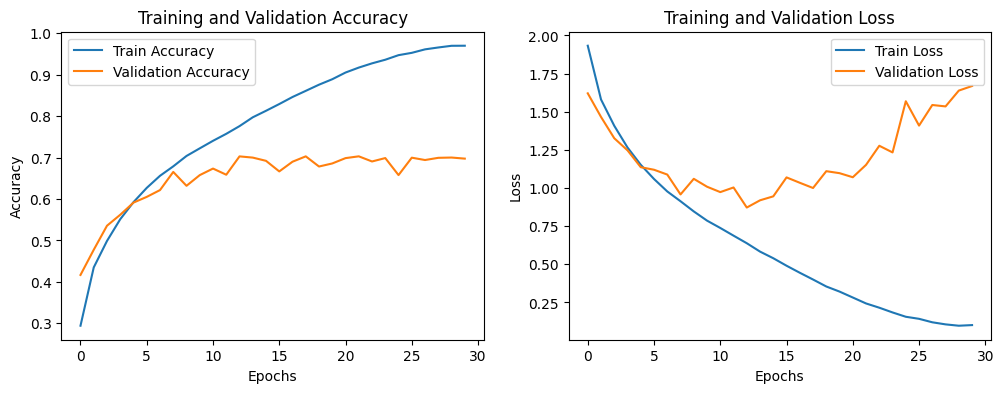

Optimizer: sgd, Loss Function: sparse_categorical_crossentropy


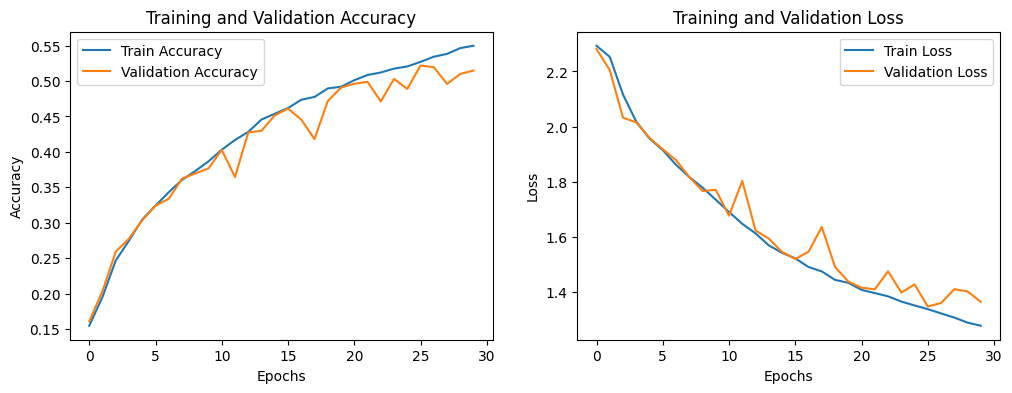

Optimizer: sgd, Loss Function: categorical_crossentropy


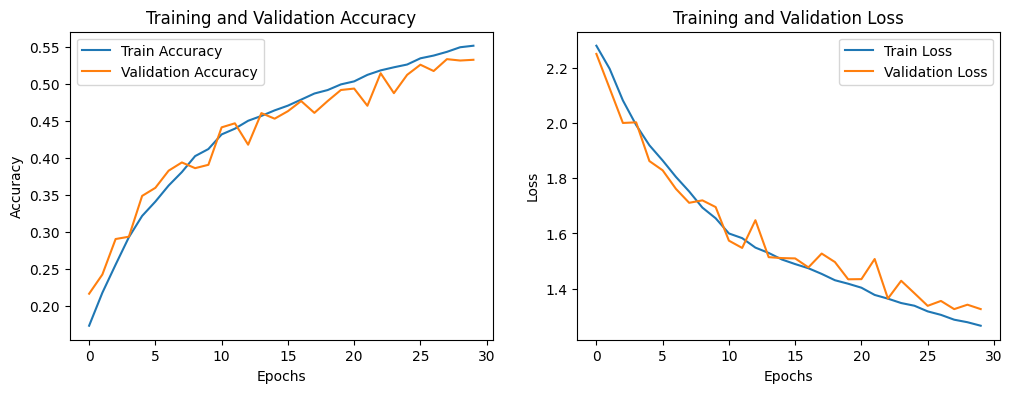

In [15]:
for optimizer in optimizers:
    for loss_function in loss_functions:
        print(f"Optimizer: {optimizer}, Loss Function: {loss_function}")

        result = results[(optimizer, loss_function)]

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(result['train_accuracy'], label='Train Accuracy')
        plt.plot(result['val_accuracy'], label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(result['train_loss'], label='Train Loss')
        plt.plot(result['val_loss'], label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Show the plots
        plt.show()

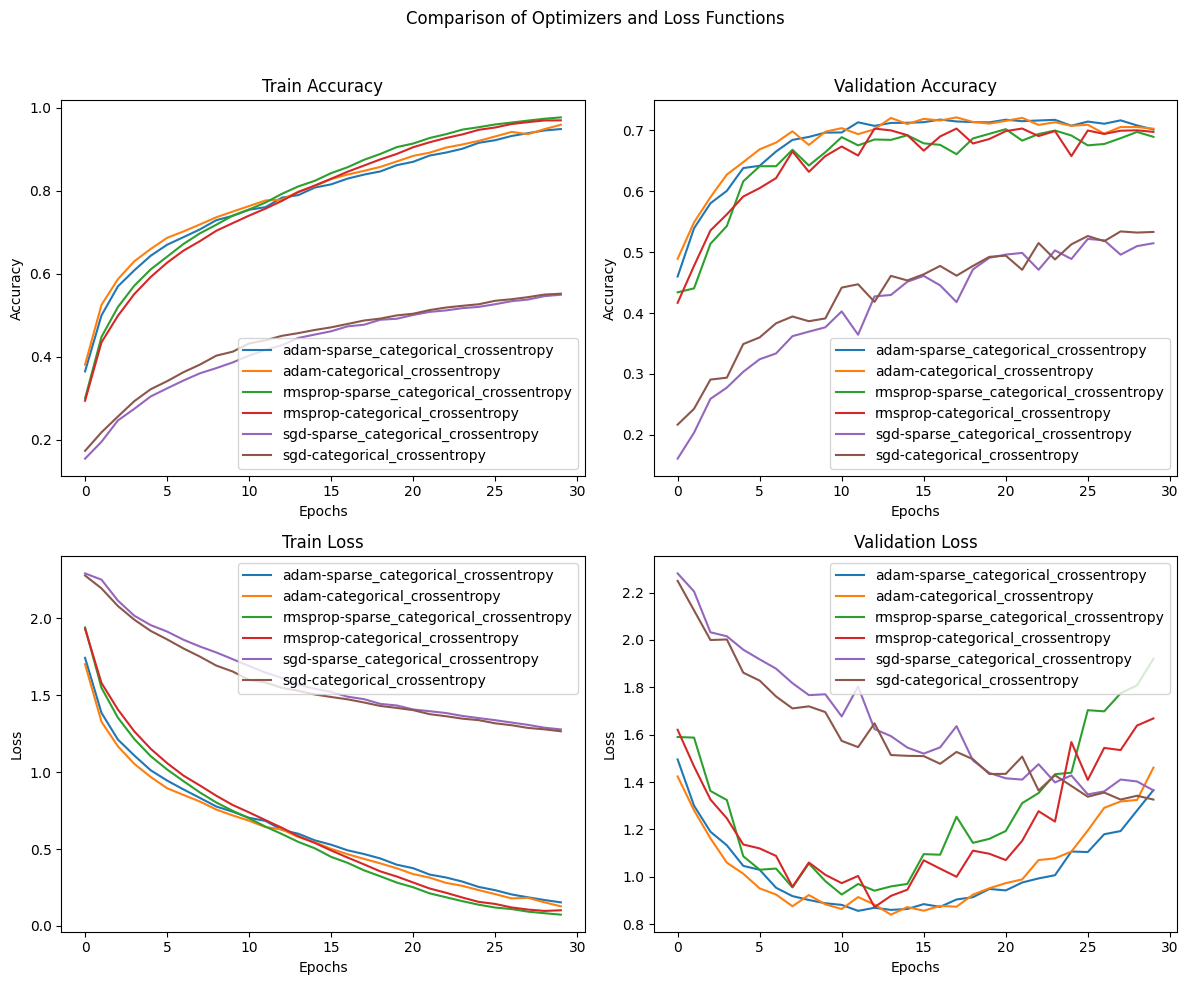

In [16]:
#Displaying the difference between the algorithms


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Comparison of Optimizers and Loss Functions')

for i, optimizer in enumerate(optimizers):
    for j, loss_function in enumerate(loss_functions):
        # Extract results
        result = results[(optimizer, loss_function)]

        # Plot Train Accuracy
        axes[0, 0].plot(result['train_accuracy'], label=f'{optimizer}-{loss_function}')
        axes[0, 0].set_title('Train Accuracy')
        axes[0, 0].set_xlabel('Epochs')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].legend()

        # Plot Validation Accuracy
        axes[0, 1].plot(result['val_accuracy'], label=f'{optimizer}-{loss_function}')
        axes[0, 1].set_title('Validation Accuracy')
        axes[0, 1].set_xlabel('Epochs')
        axes[0, 1].set_ylabel('Accuracy')
        axes[0, 1].legend()

        # Plot Train Loss
        axes[1, 0].plot(result['train_loss'], label=f'{optimizer}-{loss_function}')
        axes[1, 0].set_title('Train Loss')
        axes[1, 0].set_xlabel('Epochs')
        axes[1, 0].set_ylabel('Loss')
        axes[1, 0].legend()

        # Plot Validation Loss
        axes[1, 1].plot(result['val_loss'], label=f'{optimizer}-{loss_function}')
        axes[1, 1].set_title('Validation Loss')
        axes[1, 1].set_xlabel('Epochs')
        axes[1, 1].set_ylabel('Loss')
        axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


From the above analysis we can see that the SGD is the worst of all 3 Optimizers.